Valor de la propina: 
19.847607361963192


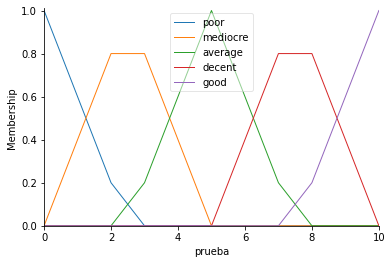

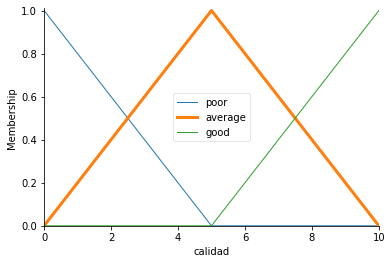

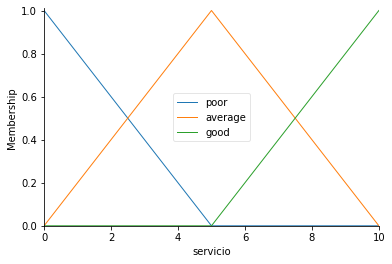

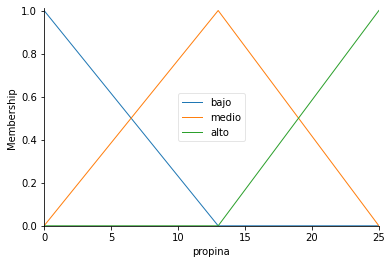

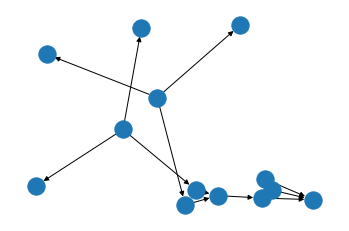

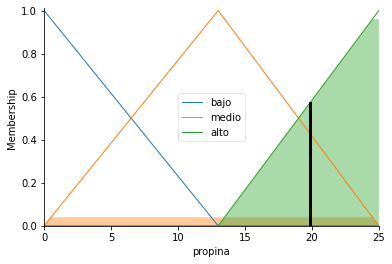

In [6]:
# CONTROL DIFUSO API

# Elimina las advertencias
import warnings
warnings.filterwarnings('ignore')

# Importa las librerías
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

# Se crean los objetos antecedentes y consecuente a partir de las 
# variables del universo y las funciones de membresía
calidad = ctrl.Antecedent(np.arange(0, 11, 1), 'calidad')
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'servicio')
propina = ctrl.Consequent(np.arange(0, 26, 1), 'propina')
analisis = ctrl.Antecedent(np.arange(0,11,1),'prueba')

# La población de la función de membresía automática es posible con .automf (3, 5 o 7)
calidad.automf(3)
servicio.automf(3)
analisis.automf(5)

# Las funciones de membresía personalizadas se pueden construir interactivamente con la
# API Pythonic
propina['bajo'] = fuzz.trimf(propina.universe, [0, 0, 13])
propina['medio'] = fuzz.trimf(propina.universe, [0, 13, 25])
propina['alto'] = fuzz.trimf(propina.universe, [13, 25, 25])

# Visualización con .view()
analisis.view()
calidad['average'].view()
servicio.view()
propina.view()

# Creación de las reglas
regla1 = ctrl.Rule(calidad['poor'] | servicio['poor'], propina['bajo'])
regla2 = ctrl.Rule(servicio['average'], propina['medio'])
regla3 = ctrl.Rule(servicio['good'] | calidad['good'], propina['alto'])

# Visualización de la regla 1
regla1.view()

# Generación del simulador
control_propina = ctrl.ControlSystem([regla1, regla2, regla3])
asignacion_propina = ctrl.ControlSystemSimulation(control_propina)


# Pasar entradas al ControlSystem usando etiquetas 'Antecedent' con Pythonic API
# Nota: si quiere pasar muchas entradas a la vez, usar .inputs (dict_of_data)
asignacion_propina.input['calidad'] = 6.5
asignacion_propina.input['servicio'] = 9.8

# Se obtiene el valor
asignacion_propina.compute()

# Se muestra la información
print("Valor de la propina: ")
print (asignacion_propina.output['propina'])

# Se muestra la curva de asignación de propina
propina.view(sim=asignacion_propina)

In [5]:
pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=358593f4b1d725de6683cf1f5eb011205297cba1de8d5875d582d1bffcf172a7
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy
